In [1]:
class Points(object):
    def __init__(self,name,points):
        self.name = name 
        self.location  = points
    def get_name(self):
        return self.name 
    def get_location(self):
        return self.location 
    def __str__(self):
        return str(self.name) + ' :   '+str(self.location)

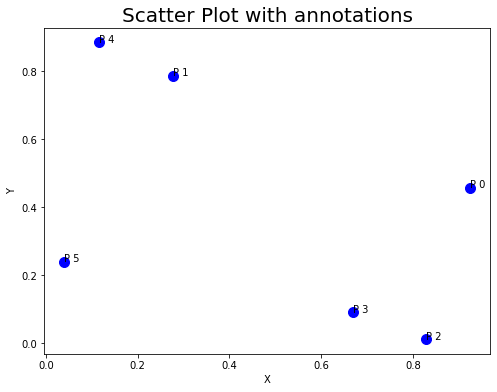

In [44]:
import random,pylab
import numpy as np
import matplotlib.pyplot as plt
points,X,Y = [],[],[]
for i in range(6):
    x=random.random()
    y = random.random()
    X.append(x)
    Y.append(y)
    points.append((x,y))
data,annotations = [] , []
for i in range(len(points)):
    data.append(Points("P "+ str(i),points[i])) 
for i in data:
    annotations.append(str(i.get_name()))
plt.figure(figsize=(8,6))
plt.scatter(X,Y,s=100,color="blue")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot with annotations",fontsize=20)
for i, label in enumerate(annotations):
    plt.annotate(label, (X[i], Y[i]))

plt.show()


In [3]:
class Cluster(object):
    def __init__(self,members,name = None ):
        self.name = name 
        self.members = members 
    def get_name(self):
        return self.name 
    def get_members(self):
        return self.members
    def see_data(self):
        print(self.name)
        for i in self.members:
            print(i)

            

In [4]:
def euclidian_distance(a,b):
    x = a.get_location()
    y  = b.get_location()
    distance = 0 
    for (i,j) in zip(x,y):
        distance += (i-j)**2
    return distance **(0.5)
    

In [5]:
euclidian_distance(data[0],data[1])

0.4367961000808344

In [45]:
distance_matrix = {}
for i in data:
    for j in data:
        if j.get_name()!= i.get_name() :
            if (i.get_name(),j.get_name()) and (j.get_name(),i.get_name()) not in distance_matrix:
                distance_matrix[(i.get_name(),j.get_name())] = euclidian_distance(i,j)
distance_matrix

{('P 0', 'P 1'): 0.726743956843796,
 ('P 0', 'P 2'): 0.45589159058822976,
 ('P 0', 'P 3'): 0.44594676262115585,
 ('P 0', 'P 4'): 0.9157621190366831,
 ('P 0', 'P 5'): 0.9115292412589038,
 ('P 1', 'P 2'): 0.9503685767040593,
 ('P 1', 'P 3'): 0.7988209425936862,
 ('P 1', 'P 4'): 0.1894278621784942,
 ('P 1', 'P 5'): 0.5965490643372868,
 ('P 2', 'P 3'): 0.1762094838859506,
 ('P 2', 'P 4'): 1.1267030668665161,
 ('P 2', 'P 5'): 0.8198688217755071,
 ('P 3', 'P 4'): 0.968408603261781,
 ('P 3', 'P 5'): 0.6475171298845604,
 ('P 4', 'P 5'): 0.6497787951709864}

In [7]:
def single_linkage(clusterx,clustery):
    #ensure to only give cluster objects as inputs
    first = clusterx.get_members()
    second = clustery.get_members()
    try:
        shortest = distance_matrix[first[0].get_name(),second[0].get_name()]
    except KeyError:
        #To account for   the order of names in the  key 
        shortest = distance_matrix[second[0].get_name(),first[0].get_name()]
    #assumes that every cluster is basically a list :
    for i in clusterx.get_members():
        for j in clustery.get_members():
            if i.get_name() != j.get_name():
                try:
                    distance = distance_matrix[(i.get_name(),j.get_name())]
                except KeyError:
                    distance = distance_matrix[(j.get_name(),i.get_name())]
                if distance < shortest:
                    shortest = distance
    return shortest
            
            
    

In [8]:
def test(data,n_clusters,show = False):
    clusters = []
    for i in data:
        clusters.append(Cluster([i],'Cluster'))
    while len(clusters)>n_clusters: 
        m = clusters[0]
        n = clusters[1]
        shortest=single_linkage(m,n)
        for i in clusters:
            for j in clusters:
                if i!=j:
                    distance = single_linkage(i,j)
                    if distance < shortest:
                        shortest = distance
                        m= i 
                        n = j
        clusters.append(Cluster(m.get_members()+n.get_members(),'Cluster'))
        clusters.remove(m)
        clusters.remove(n)
    if show:
        for i in clusters:
            i.see_data()
    return clusters
            
                    
            
        

In [46]:
test(data,3,True)

Cluster
P 5 :   (0.04002353689016469, 0.2396333648675093)
Cluster
P 1 :   (0.2771827661076983, 0.7870146635603288)
P 4 :   (0.1151024984279273, 0.8850600703796611)
Cluster
P 0 :   (0.9250672021084733, 0.4577692590412453)
P 2 :   (0.8277681566457297, 0.012381744486666624)
P 3 :   (0.670411639023931, 0.09168312261651779)
